In [58]:
# import data manipulation liabrary
import pandas as pd
import numpy as np
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level =  logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    force = True)


In [59]:
# Import Dataset using Pandas Function
df = pd.read_csv('train.csv')

In [60]:
# Shiffle fraction of the dataset : frac = 1 ensures 100 % shuffle
df.sample(frac =1)

TypeError: cannot do positional indexing on Index with these indexers [True] of type bool

TypeError: cannot do positional indexing on Index with these indexers [True] of type bool

In [61]:
'''
1. The minimum number of rows required for dataset = 20 * No.of Independentent
   columns.Therefore 20 * 80 = 1600 rows
   
2. We have 81 Columns including Target + Independent Column

3. Target Column : SalesPrice

4. As the minimum number of rows 1600 > compared with dataset rows (1460).
   hence, we have to reduce the no of columns using Data processing and cleaning.


'''

'\n1. The minimum number of rows required for dataset = 20 * No.of Independentent\n   columns.Therefore 20 * 80 = 1600 rows\n   \n2. We have 81 Columns including Target + Independent Column\n\n3. Target Column : SalesPrice\n\n4. As the minimum number of rows 1600 > compared with dataset rows (1460).\n   hence, we have to reduce the no of columns using Data processing and cleaning.\n\n\n'

In [62]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

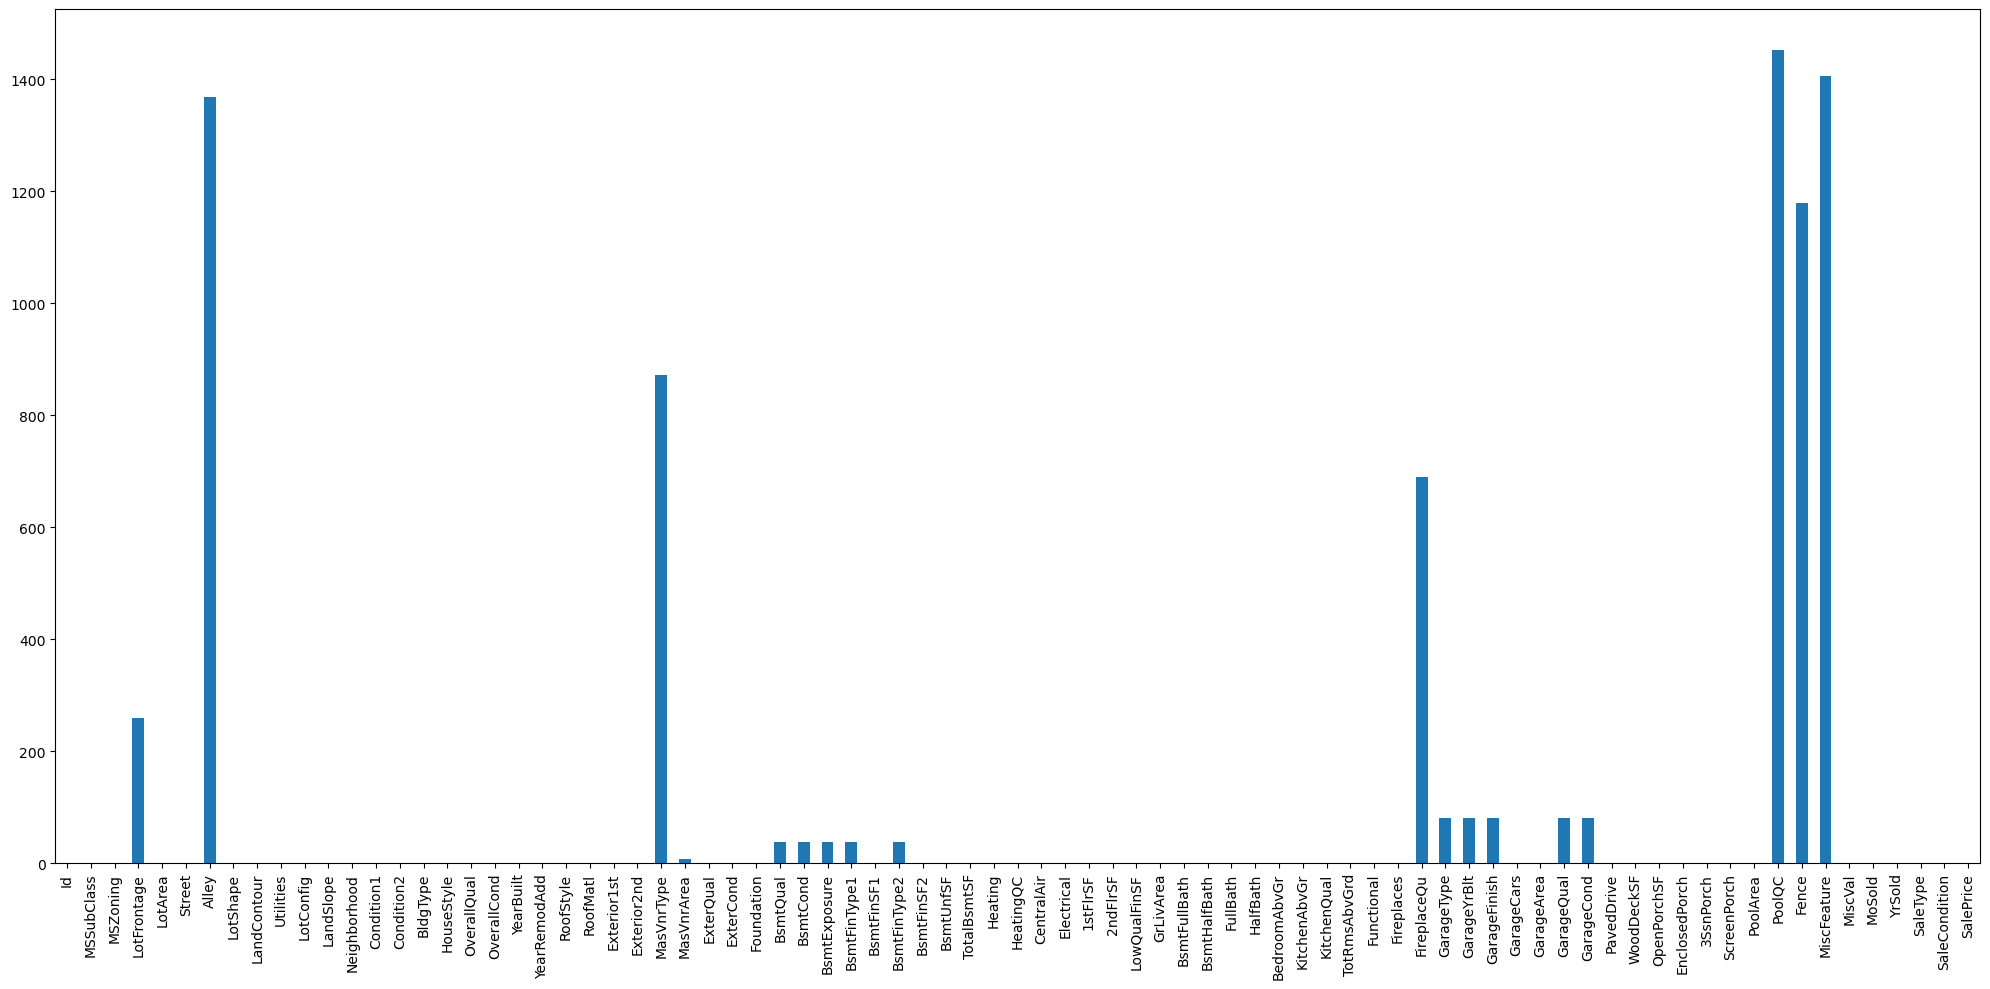

In [63]:
# Checking Null Values present in the dataset
plt.figure(figsize=(20,10))
df.isnull().sum().plot(kind = 'bar')
plt.tight_layout()
plt.show()

In [64]:
# Segregate numerical_columns and categorical_column

numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

In [65]:
# Use Data Cleaning
df = df.drop(columns= ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis = 1)
# Segregate Numerical Columns and Categorical columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [70]:
# Imputing Missing values  Information
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'median')

for i in numerical_col.columns:
  df[i] = si.fit_transform(df[[i]])

In [71]:
sc = SimpleImputer(strategy= 'most_frequent')

for i in categorical_col.columns:
    df[i] =sc.fit_transform(df[[i]]).ravel()

<Axes: >

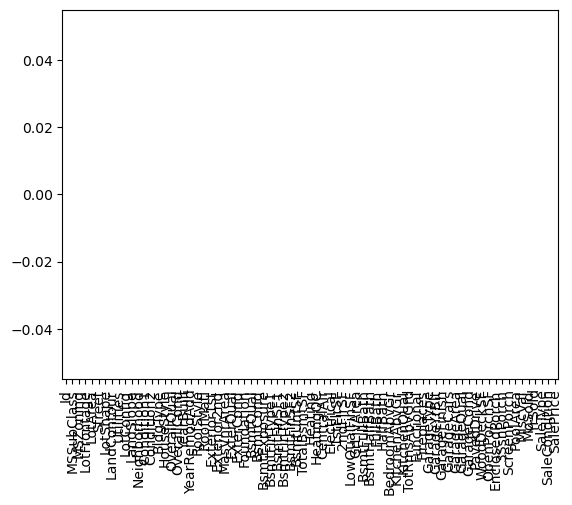

In [72]:
df.isnull().sum().plot(kind = 'bar')